# **Import library**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [4]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import time

# **Load the data sets**

In [5]:
# def download_data(folder_id):
#     url = f"https://drive.google.com/drive/folders/{folder_id}"
#     # gdown URL format
#     gdown.download_folder(url=url, output="./downloaded_folder", quiet=False, use_cookies=False)

In [6]:
# def decompress_gz(file_path, output_file_name):
#     with gzip.open(file_path, 'rb') as f_in:
#         with open(output_file_name, 'wb') as f_out:
#             shutil.copyfileobj(f_in, f_out)

In [7]:
# if __name__ == '__main__':
#     # downloading raw dataset
#     download_data("14ZG8utOf0Ry76w_T9rqrk5kdhhPIK84P")
#     # Check if the downloaded folder exists before proceeding
#     import os
#     if os.path.exists('/kaggle/working/downloaded_folder/accepted_2007_to_2018Q4.csv.gz'):
#         decompress_gz('/kaggle/working/downloaded_folder/accepted_2007_to_2018Q4.csv.gz', "accepted.csv")
#     else:
#         print("Downloaded file not found. Please check the download process.")

In [8]:
accepted_df = pd.read_csv("/content/df_cleaned (2).csv", low_memory=False)
accepted_df.head()

,last_pymnt_d,total_rec_prncp,last_pymnt_amnt,out_prncp,total_rec_late_fee,last_fico_range_high,installment,loan_amnt,total_rec_int,out_prncp_inv,...,funded_amnt_inv,recoveries,debt_settlement_flag,hardship_flag,mo_sin_old_rev_tl_op,revol_util,dti,all_util,annual_inc,loan_status
0,17,-0.332581,-0.372797,0.420080,-0.261895,0.281611,-0.473027,-0.461473,0.413942,0.420298,...,-0.461004,-0.445598,0,0,-0.307356,0.608376,0.558953,0.915820,-1.203816,0
1,31,-0.840560,-0.473603,-0.629220,-0.261895,1.244049,-1.608631,-1.601510,-1.081823,-0.629167,...,-1.601271,-0.445598,0,0,-0.187187,-1.880835,-1.233491,-0.049124,0.274631,1
2,27,-0.250720,-0.222228,2.263937,-0.261895,0.883135,1.252073,1.058575,-0.380182,2.264445,...,1.059353,-0.445598,0,0,-0.980297,0.431193,-0.223328,0.379740,2.227297,1
3,39,-0.458023,0.161605,-0.629220,-0.261895,0.161306,-1.364264,-1.373503,-0.909433,-0.629167,...,-1.373218,-0.445598,0,0,-1.472987,0.314511,-0.337836,0.433348,-1.231711,1
4,5,-0.415519,0.220569,-0.629220,-0.261895,0.221459,-1.317547,-1.348168,-0.834440,-0.629167,...,-1.347878,-0.445598,0,0,0.738107,1.273894,0.117928,1.559116,-0.841178,1


# **preprocessing**

In [9]:
df=accepted_df.copy()

In [10]:
df.shape

(119286, 21)

In [11]:
df.isna().sum()

,0
last_pymnt_d,0
total_rec_prncp,0
last_pymnt_amnt,0
out_prncp,0
total_rec_late_fee,0
last_fico_range_high,0
installment,0
loan_amnt,0
total_rec_int,0
out_prncp_inv,0


In [12]:
# Print all column names
print(accepted_df.columns.tolist())

['last_pymnt_d', 'total_rec_prncp', 'last_pymnt_amnt', 'out_prncp', 'total_rec_late_fee', 'last_fico_range_high', 'installment', 'loan_amnt', 'total_rec_int', 'out_prncp_inv', 'total_pymnt', 'funded_amnt_inv', 'recoveries', 'debt_settlement_flag', 'hardship_flag', 'mo_sin_old_rev_tl_op', 'revol_util', 'dti', 'all_util', 'annual_inc', 'loan_status']


In [13]:
cat_cols = accepted_df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in cat_cols:
      le = LabelEncoder()
      df[col] = le.fit_transform(df[col])
      label_encoders[col] = le

In [14]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
y_train.value_counts(normalize=True)

,proportion
loan_status,
1,0.521199
0,0.478801


In [17]:
y_test.value_counts(normalize=True)

,proportion
loan_status,
1,0.515928
0,0.484072


# **SVM**

In [27]:
def create_svm_model(model_type):
    """
    Create an SVM model based on specified parameters.

    Parameters:
    -----------
    model_type : str
        Type of SVM model to create: 'rbf', 'linear', 'polynomial', or 'sigmoid'

    Returns:
    --------
    sklearn.svm.SVC
        The configured SVM model
    """
    if model_type == 'rbf':
        # SVM RBF
        return svm.SVC(kernel='rbf', C=10, gamma=0.01, random_state=42, probability=True)
    elif model_type == 'linear':
        # SVM Linear
        return svm.SVC(kernel='linear', C=10, gamma=0.1, coef0=100, random_state=42, probability=True)

    # elif model_type == 'polynomial':
    #     # SVM Polynomial
    #     return svm.SVC(kernel='poly', C=10, gamma=1, coef0=10, degree=2, random_state=42, probability=True)

    # elif model_type == 'sigmoid':
    #     # SVM Sigmoid
    #     return svm.SVC(kernel='sigmoid', C=0.01, gamma=0.01, coef0=0.01, random_state=42, probability=True)

    else:
        raise ValueError(f"Unsupported model type: {model_type}")

In [28]:
# Train and evaluate SVM models with different kernels
results = {}
model_types = ['rbf', 'linear']
display_names = ['RBF', 'Linear']
accuracies = []
training_times = []

# Train and evaluate each model type
for i, model_type in enumerate(model_types):
    print(f"\n--- Training SVM with {display_names[i]} Kernel ---")

    # Create model using the function
    start_time = time.time()
    model = create_svm_model(model_type)

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_type] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm,
        'training_time': training_time,
        'y_pred': y_pred
    }

    # Store for comparison
    accuracies.append(accuracy)
    training_times.append(training_time)

    # Print results
    print(f"{display_names[i]} Accuracy: {accuracy:.4f}")
    print(f"Training time: {training_time:.2f} seconds")
    print("Classification Report:")
    print(report)




--- Training SVM with RBF Kernel ---
RBF Accuracy: 0.9887
Training time: 316.93 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     11549
           1       0.98      0.99      0.99     12309

    accuracy                           0.99     23858
   macro avg       0.99      0.99      0.99     23858
weighted avg       0.99      0.99      0.99     23858


--- Training SVM with Linear Kernel ---
Linear Accuracy: 0.9665
Training time: 2505.17 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     11549
           1       0.96      0.98      0.97     12309

    accuracy                           0.97     23858
   macro avg       0.97      0.97      0.97     23858
weighted avg       0.97      0.97      0.97     23858



In [32]:
for model_type, result in results.items():
    y_pred = result['y_pred']
    y_pred_proba = result['model'].predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n--- {model_type.upper()} Model Metrics ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")



--- RBF Model Metrics ---
Accuracy: 0.9887
F1 Score: 0.9891
ROC AUC: 0.9974

--- LINEAR Model Metrics ---
Accuracy: 0.9665
F1 Score: 0.9679
ROC AUC: 0.9948


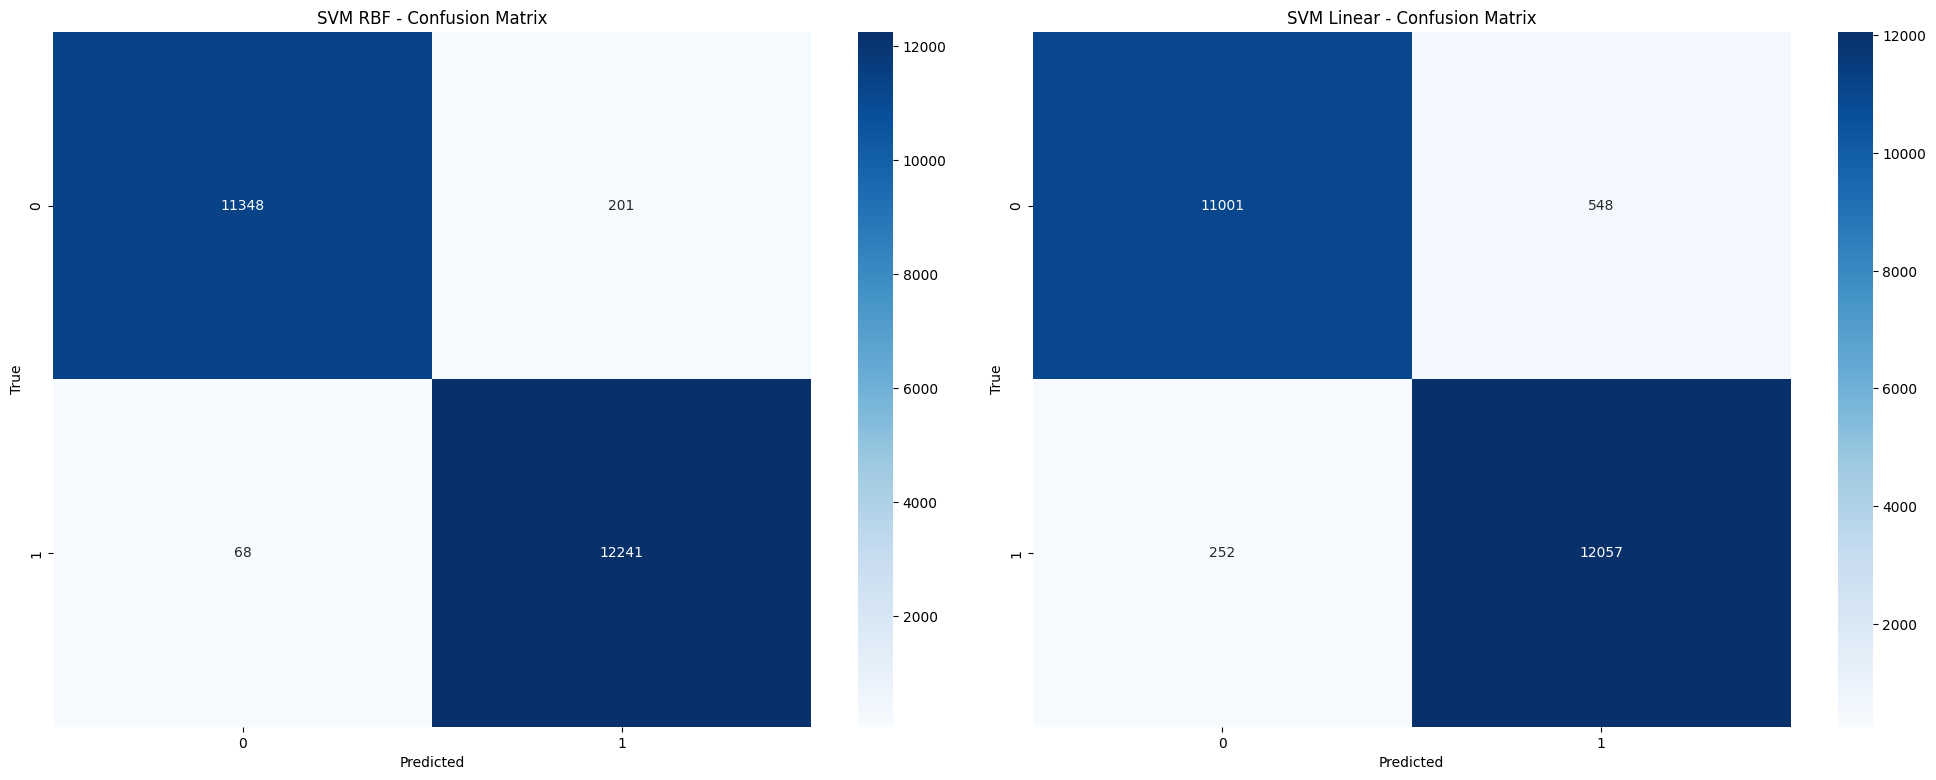

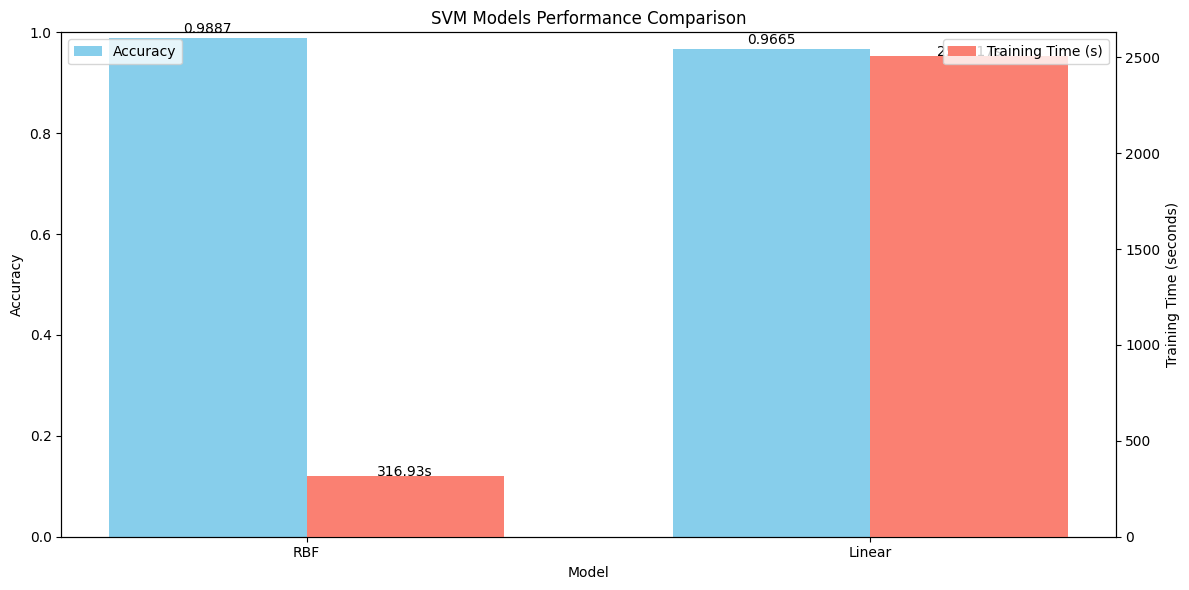

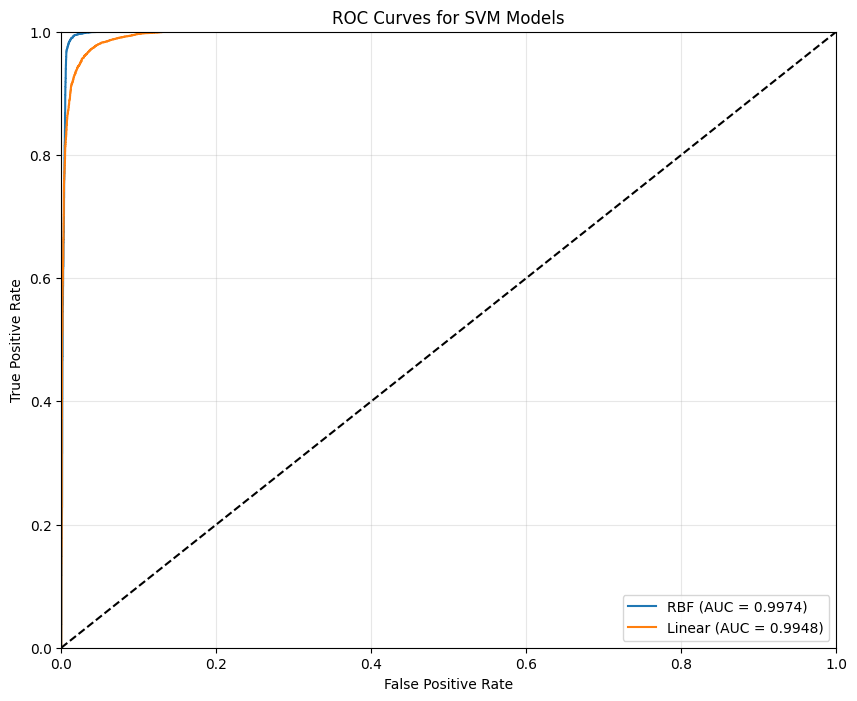

In [29]:
# 1. Confusion matrices
plt.figure(figsize=(20, 15))

for i, model_type in enumerate(model_types):
    plt.subplot(2, 2, i+1)
    sns.heatmap(results[model_type]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'SVM {display_names[i]} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.savefig('svm_confusion_matrices.png')
plt.show()

# 2. Model performance comparison
fig, ax1 = plt.figure(figsize=(12, 6)), plt.subplot(111)
ax2 = ax1.twinx()

x = np.arange(len(display_names))
bar_width = 0.35

rects1 = ax1.bar(x - bar_width/2, accuracies, bar_width, label='Accuracy', color='skyblue')
rects2 = ax2.bar(x + bar_width/2, training_times, bar_width, label='Training Time (s)', color='salmon')

ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
ax2.set_ylabel('Training Time (seconds)')
ax1.set_xticks(x)
ax1.set_xticklabels(display_names)
ax1.set_title('SVM Models Performance Comparison')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

for i, v in enumerate(accuracies):
    ax1.text(i - bar_width/2, v + 0.01, f'{v:.4f}', ha='center')

for i, v in enumerate(training_times):
    ax2.text(i + bar_width/2, v + 0.1, f'{v:.2f}s', ha='center')

plt.tight_layout()
plt.savefig('svm_performance_comparison.png')
plt.show()

# 3. ROC curves
plt.figure(figsize=(10, 8))

for i, model_type in enumerate(model_types):
    model = results[model_type]['model']
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{display_names[i]} (AUC = {roc_auc:.4f})')

# Add diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM Models')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig('svm_roc_curves.png')
plt.show()
